# Modelling VO2 Max from Health and Sports Stats, gathered from Garmin Smartwatch via Garmin Connect API
[VO2 Max](https://en.wikipedia.org/wiki/VO2_max) can be an indicator of overall aerobic fitness level. Using the [Garmin Connect Python API](https://pypi.org/project/garminconnect/0.1.16/), gather relevant metrics, fit to regression model and inspect feature importance metrics using SHAP ([SHapley Additive exPlanations](https://christophm.github.io/interpretable-ml-book/shapley.html)) values. Here I track my Running VO2 Max over the past year, and investigate if there are any particular features that impact the VO2 Max score.

In [ ]:
from garminconnect import (
    Garmin,
    GarminConnectConnectionError,
    GarminConnectTooManyRequestsError,
    GarminConnectAuthenticationError,
)

In [464]:
import datetime
from datetime import date
import calendar
import pandas as pd
from tqdm import tqdm

YOUR_EMAIL = "**************"
YOUR_PASSWORD = "***********"


"""
Initialize Garmin client with credentials
Only needed when your program is initialized
"""
try:
    client = Garmin(YOUR_EMAIL, YOUR_PASSWORD)
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client init: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client init")
    quit()



In [465]:

"""
Login to Garmin Connect portal
Only needed at start of your program
The libary will try to relogin when session expires
"""
try:
    client.login()
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client login: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client login")
    quit()





In [466]:
"""
Get full name from profile
"""
try:
    print(client.get_full_name())
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client get full name: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client get full name")
    quit()


Mark


In [467]:
"""
Get activity data
"""
try:
    print(client.get_stats(today.isoformat()))
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client get stats: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client get stats")
    quit()

{'userProfileId': 83229810, 'totalKilocalories': 2876.0, 'activeKilocalories': 602.0, 'bmrKilocalories': 2274.0, 'wellnessKilocalories': 2876.0, 'burnedKilocalories': None, 'consumedKilocalories': 0.0, 'remainingKilocalories': 2876.0, 'totalSteps': 6585, 'netCalorieGoal': 2350, 'totalDistanceMeters': 6583, 'wellnessDistanceMeters': 6583, 'wellnessActiveKilocalories': 602.0, 'netRemainingKilocalories': 2952.0, 'userDailySummaryId': 83229810, 'calendarDate': '2021-01-27', 'rule': {'typeId': 2, 'typeKey': 'private'}, 'uuid': '6ef75b0d977a458aace5ac2314c10ce0', 'dailyStepGoal': 6930, 'wellnessStartTimeGmt': '2021-01-27T00:00:00.0', 'wellnessStartTimeLocal': '2021-01-27T00:00:00.0', 'wellnessEndTimeGmt': '2021-01-28T00:00:00.0', 'wellnessEndTimeLocal': '2021-01-28T00:00:00.0', 'durationInMilliseconds': 86400000, 'wellnessDescription': None, 'highlyActiveSeconds': 2290, 'activeSeconds': 1585, 'sedentarySeconds': 53065, 'sleepingSeconds': 29460, 'includesWellnessData': True, 'includesActivity

# Gather year's data for Heart Rate, Sleep, Stress:

In [468]:
"""
Get stats and body composition data
"""
try:
    print(client.get_stats_and_body(today.isoformat()))
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client get stats and body composition: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client get stats and body composition")
    quit()

{'userProfileId': 83229810, 'totalKilocalories': 2876.0, 'activeKilocalories': 602.0, 'bmrKilocalories': 2274.0, 'wellnessKilocalories': 2876.0, 'burnedKilocalories': None, 'consumedKilocalories': 0.0, 'remainingKilocalories': 2876.0, 'totalSteps': 6585, 'netCalorieGoal': 2350, 'totalDistanceMeters': 6583, 'wellnessDistanceMeters': 6583, 'wellnessActiveKilocalories': 602.0, 'netRemainingKilocalories': 2952.0, 'userDailySummaryId': 83229810, 'calendarDate': '2021-01-27', 'rule': {'typeId': 2, 'typeKey': 'private'}, 'uuid': '6ef75b0d977a458aace5ac2314c10ce0', 'dailyStepGoal': 6930, 'wellnessStartTimeGmt': '2021-01-27T00:00:00.0', 'wellnessStartTimeLocal': '2021-01-27T00:00:00.0', 'wellnessEndTimeGmt': '2021-01-28T00:00:00.0', 'wellnessEndTimeLocal': '2021-01-28T00:00:00.0', 'durationInMilliseconds': 86400000, 'wellnessDescription': None, 'highlyActiveSeconds': 2290, 'activeSeconds': 1585, 'sedentarySeconds': 53065, 'sleepingSeconds': 29460, 'includesWellnessData': True, 'includesActivity

In [469]:
def get_dates_for_year(year):
    print(month)
    num_days = calendar.monthrange(year, month)[1]
    print(num_days)
    days = [datetime.date(year, month, day) for day in range(1, num_days+1)]
    print(days)
    return days

timeline = []

# 2020: Feb -> onwards  (got watch in Feb)
for month in range(2,13):
    months = get_dates_for_year(2020)
    timeline.append(months)

# 2021: Jan
for month in range(1,2):
    months = get_dates_for_year(2021)
    timeline.append(months)


2
29
[datetime.date(2020, 2, 1), datetime.date(2020, 2, 2), datetime.date(2020, 2, 3), datetime.date(2020, 2, 4), datetime.date(2020, 2, 5), datetime.date(2020, 2, 6), datetime.date(2020, 2, 7), datetime.date(2020, 2, 8), datetime.date(2020, 2, 9), datetime.date(2020, 2, 10), datetime.date(2020, 2, 11), datetime.date(2020, 2, 12), datetime.date(2020, 2, 13), datetime.date(2020, 2, 14), datetime.date(2020, 2, 15), datetime.date(2020, 2, 16), datetime.date(2020, 2, 17), datetime.date(2020, 2, 18), datetime.date(2020, 2, 19), datetime.date(2020, 2, 20), datetime.date(2020, 2, 21), datetime.date(2020, 2, 22), datetime.date(2020, 2, 23), datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), datetime.date(2020, 2, 27), datetime.date(2020, 2, 28), datetime.date(2020, 2, 29)]
3
31
[datetime.date(2020, 3, 1), datetime.date(2020, 3, 2), datetime.date(2020, 3, 3), datetime.date(2020, 3, 4), datetime.date(2020, 3, 5), datetime.date(2020, 3, 6), datetime.date(2020, 3, 

In [470]:
timeline

[[datetime.date(2020, 2, 1),
  datetime.date(2020, 2, 2),
  datetime.date(2020, 2, 3),
  datetime.date(2020, 2, 4),
  datetime.date(2020, 2, 5),
  datetime.date(2020, 2, 6),
  datetime.date(2020, 2, 7),
  datetime.date(2020, 2, 8),
  datetime.date(2020, 2, 9),
  datetime.date(2020, 2, 10),
  datetime.date(2020, 2, 11),
  datetime.date(2020, 2, 12),
  datetime.date(2020, 2, 13),
  datetime.date(2020, 2, 14),
  datetime.date(2020, 2, 15),
  datetime.date(2020, 2, 16),
  datetime.date(2020, 2, 17),
  datetime.date(2020, 2, 18),
  datetime.date(2020, 2, 19),
  datetime.date(2020, 2, 20),
  datetime.date(2020, 2, 21),
  datetime.date(2020, 2, 22),
  datetime.date(2020, 2, 23),
  datetime.date(2020, 2, 24),
  datetime.date(2020, 2, 25),
  datetime.date(2020, 2, 26),
  datetime.date(2020, 2, 27),
  datetime.date(2020, 2, 28),
  datetime.date(2020, 2, 29)],
 [datetime.date(2020, 3, 1),
  datetime.date(2020, 3, 2),
  datetime.date(2020, 3, 3),
  datetime.date(2020, 3, 4),
  datetime.date(2020, 

In [471]:

data = client.get_stats_and_body(today.isoformat())
restingHeartRate = data.get("restingHeartRate")
print(datetime.date(2020, 2, 18).isoformat())
print(restingHeartRate)
averageStressLevel = data.get("averageStressLevel")
print(averageStressLevel)
sleepingSeconds = data.get("sleepingSeconds")
print(sleepingSeconds)

2020-02-18
58
35
29460


In [472]:
date_col = []
resting_HR_col = []
stress_col = []
sleep_col = []

for month in tqdm(timeline):
    #print(month)
    for day in month:
        date_col.append(day.isoformat())
        data = client.get_stats_and_body(day.isoformat())
        resting_HR = data.get("restingHeartRate")
        resting_HR_col.append(resting_HR)
        average_stress = data.get("averageStressLevel")
        stress_col.append(average_stress)
        sleeping_secs = data.get("sleepingSeconds")
                  
        try:
            sleeping_hours = sleeping_secs/3600
            if sleeping_hours > 2:        # require at least 2 continuous hours recorded to be deemed valid sleep
                sleep_col.append(sleeping_hours)
            else:
                sleep_col.append(None)
        except:                           # exception to handle future dates that haven't had sleep recorded yet
            sleep_col.append(None)
            continue

dict_ = {'Date': date_col, 'resting_HR': resting_HR_col, 'average_stress': stress_col, 'sleeping_hours': sleep_col}
df = pd.DataFrame(data=dict_)

100%|██████████████████████████████████████████████████████████████████████████████████| 12/12 [03:52<00:00, 19.39s/it]


In [473]:
df.head(400)

,Date,resting_HR,average_stress,sleeping_hours
0,2020-02-01,57.0,37.0,5.716667
1,2020-02-02,54.0,29.0,10.700000
2,2020-02-03,57.0,30.0,8.383333
3,2020-02-04,54.0,39.0,10.583333
4,2020-02-05,53.0,32.0,7.233333
...,...,...,...,...
361,2021-01-27,58.0,35.0,8.183333
362,2021-01-28,57.0,13.0,7.116667
363,2021-01-29,NaN,NaN,NaN
364,2021-01-30,NaN,NaN,NaN


In [474]:
df.to_csv("year_stats.csv")

In [475]:
df = pd.read_csv("year_stats.csv")

# Gather data for all runs this year - run metrics such as VO2, kilometres per run, avg HR per run, run duration, run cadence:

In [476]:
"""
Get activities data
"""
try:
    print(client.get_activities(0,1)) # 0=start, 1=limit  For 1 day
except (
    GarminConnectConnectionError,
    GarminConnectAuthenticationError,
    GarminConnectTooManyRequestsError,
) as err:
    print("Error occured during Garmin Connect Client get activities: %s" % err)
    quit()
except Exception:  # pylint: disable=broad-except
    print("Unknown error occured during Garmin Connect Client get activities")
    quit()

[{'activityId': 6176380173, 'activityName': 'County Galway Running', 'description': None, 'startTimeLocal': '2021-01-27 16:08:22', 'startTimeGMT': '2021-01-27 16:08:22', 'activityType': {'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'sortOrder': 3, 'isHidden': False}, 'eventType': {'typeId': 9, 'typeKey': 'uncategorized', 'sortOrder': 10}, 'comments': None, 'parentId': None, 'distance': 4846.77001953125, 'duration': 1564.8070068359375, 'elapsedDuration': 1606990.966796875, 'movingDuration': 1557.5350036621094, 'elevationGain': 33.0, 'elevationLoss': 30.0, 'averageSpeed': 3.0969998836517334, 'maxSpeed': 3.694999933242798, 'startLatitude': 53.6060181632638, 'startLongitude': -8.558063032105565, 'hasPolyline': True, 'ownerId': 83229810, 'ownerDisplayName': 'b07b8631-aedb-46ae-bf26-93a028ed5f28', 'ownerFullName': 'Mark', 'ownerProfileImageUrlSmall': 'https://s3.amazonaws.com/garmin-connect-prod/profile_images/5acb538f-2fe2-4260-b8dd-be167c6235c2-83229810.png', 'ownerProfileImageUr

In [477]:
w = client.get_activities(0,1) # 0=start, 1=limit
for f in w:
    for i in f:
        print(i)

activityId
activityName
description
startTimeLocal
startTimeGMT
activityType
eventType
comments
parentId
distance
duration
elapsedDuration
movingDuration
elevationGain
elevationLoss
averageSpeed
maxSpeed
startLatitude
startLongitude
hasPolyline
ownerId
ownerDisplayName
ownerFullName
ownerProfileImageUrlSmall
ownerProfileImageUrlMedium
ownerProfileImageUrlLarge
calories
averageHR
maxHR
averageRunningCadenceInStepsPerMinute
maxRunningCadenceInStepsPerMinute
averageBikingCadenceInRevPerMinute
maxBikingCadenceInRevPerMinute
averageSwimCadenceInStrokesPerMinute
maxSwimCadenceInStrokesPerMinute
averageSwolf
activeLengths
steps
conversationUuid
conversationPk
numberOfActivityLikes
numberOfActivityComments
likedByUser
commentedByUser
activityLikeDisplayNames
activityLikeFullNames
requestorRelationship
userRoles
privacy
userPro
courseId
poolLength
unitOfPoolLength
hasVideo
videoUrl
timeZoneId
beginTimestamp
sportTypeId
avgPower
maxPower
aerobicTrainingEffect
anaerobicTrainingEffect
strokes
norm

In [478]:
vo2 =client.get_activities(0,300)

import numpy as np
metrics = [[],[],[],[],[],[]]
for data in vo2:
    
    print('##############')
    
    vo2_reading = data.get("vO2MaxValue")
    event_type = data.get("activityType")
    date = data.get("startTimeGMT")[:10]
    kiloms = data.get("distance")
    av_HR_for_run = data.get("averageHR")
    time_to_complete_run = data.get("movingDuration")/60
    cadence = data.get("averageRunningCadenceInStepsPerMinute")
    
    if event_type.get('typeKey') == 'running':
        print('lkj')
        print(vo2_reading)
        print(event_type)
        print(date)
        print(kiloms)
        print(f"av. run HR: {av_HR_for_run}")
        print(time_to_complete_run)
        #break
        metrics[0].append(vo2_reading)
        metrics[1].append(date)
        metrics[2].append(kiloms/1000)
        metrics[3].append(av_HR_for_run)
        metrics[4].append(time_to_complete_run)
        metrics[5].append(cadence)
        

print(len(vo2))
print(metrics)

##############
lkj
55.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'sortOrder': 3, 'isHidden': False}
2021-01-27
4846.77001953125
av. run HR: 170.0
25.958916727701823
##############
##############
lkj
55.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'sortOrder': 3, 'isHidden': False}
2021-01-24
5036.5
av. run HR: 159.0
28.787816365559895
##############
lkj
55.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'sortOrder': 3, 'isHidden': False}
2021-01-20
4877.509765625
av. run HR: 165.0
27.766133117675782
##############
lkj
55.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'sortOrder': 3, 'isHidden': False}
2021-01-16
4926.52978515625
av. run HR: 165.0
27.67195027669271
##############
##############
lkj
55.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'sortOrder': 3, 'isHidden': False}
2021-01-14
5009.759765625
av. run HR: 168.0
28.474733090400697
##############
lkj
55.0
{'typeId': 1, 'typeKey': 'running', 'parentTypeId': 17, 'sort

In [479]:
d = {'VO2': metrics[0], 'Date': metrics[1], 'Km': metrics[2], 'Av_HR_for_Run': metrics[3], 'run_time': metrics[4],
    'av_cadence': metrics[5]}
df2 = pd.DataFrame(data=d)
df2

,VO2,Date,Km,Av_HR_for_Run,run_time,av_cadence
0,55.0,2021-01-27,4.84677,170.0,25.958917,176.343750
1,55.0,2021-01-24,5.03650,159.0,28.787816,172.125000
2,55.0,2021-01-20,4.87751,165.0,27.766133,178.718750
3,55.0,2021-01-16,4.92653,165.0,27.671950,170.000000
4,55.0,2021-01-14,5.00976,168.0,28.474733,162.843750
...,...,...,...,...,...,...
81,50.0,2020-02-23,3.40315,179.0,17.599750,169.671875
82,50.0,2020-02-19,5.01817,172.0,25.808250,172.281250
83,51.0,2020-02-15,3.58548,172.0,19.761767,164.984375
84,51.0,2020-02-08,5.00692,180.0,25.969216,166.296875


### Join on date - common variable between run data and everyday data (sleep,hr and stress):

In [480]:
result = pd.merge(df,
                  df2,
                  on='Date',
                  how='left')

In [481]:
result['ind'] = result.index
result.head(362)

,Unnamed: 0,Date,resting_HR,average_stress,sleeping_hours,VO2,Km,Av_HR_for_Run,run_time,av_cadence,ind
0,0,2020-02-01,57.0,37.0,5.716667,NaN,NaN,NaN,NaN,NaN,0
1,1,2020-02-02,54.0,29.0,10.700000,52.0,8.03267,180.0,49.979550,165.37500,1
2,2,2020-02-03,57.0,30.0,8.383333,NaN,NaN,NaN,NaN,NaN,2
3,3,2020-02-04,54.0,39.0,10.583333,NaN,NaN,NaN,NaN,NaN,3
4,4,2020-02-05,53.0,32.0,7.233333,NaN,NaN,NaN,NaN,NaN,4
...,...,...,...,...,...,...,...,...,...,...,...
357,350,2021-01-16,53.0,33.0,7.416667,55.0,4.92653,165.0,27.671950,170.00000,357
358,351,2021-01-17,53.0,36.0,7.166667,NaN,NaN,NaN,NaN,NaN,358
359,352,2021-01-18,52.0,23.0,8.416667,NaN,NaN,NaN,NaN,NaN,359
360,353,2021-01-19,50.0,24.0,7.966667,NaN,NaN,NaN,NaN,NaN,360


# Fit model to calculate Shapely Feature importance:

In [482]:
ml = result.dropna(subset=['VO2'])
import xgboost as xgb
from sklearn.model_selection import train_test_split
ml.head(300)
y = ml['VO2']
X = ml[['resting_HR','average_stress', 'Km','Av_HR_for_Run','run_time', 'sleeping_hours','av_cadence',]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = xgb.XGBRegressor()

model.fit(X_train, y_train)
pred = model.predict(X_test)

In [483]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred)

0.8701482500348773

[0.07534279 0.15160981 0.04764181 0.18390603 0.3164689  0.17732798
 0.04770267]


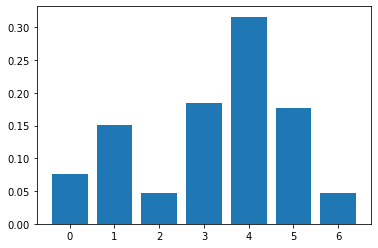

In [485]:
import matplotlib.pyplot as plt
print(model.feature_importances_)
# plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()

In [486]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

In [487]:
shap.force_plot(explainer.expected_value, shap_values[10], features=X_test.iloc[10], feature_names=X_test.columns)

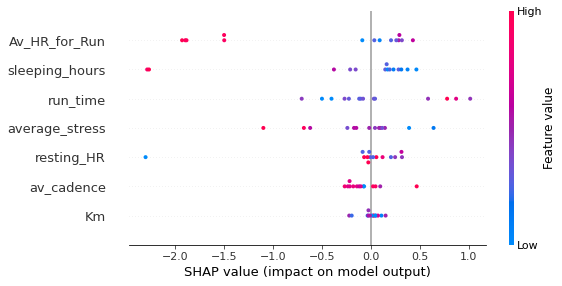

In [488]:
shap.summary_plot(shap_values, features=X_test, feature_names=X_test.columns)

#shap.summary_plot(shap_values, X_train)

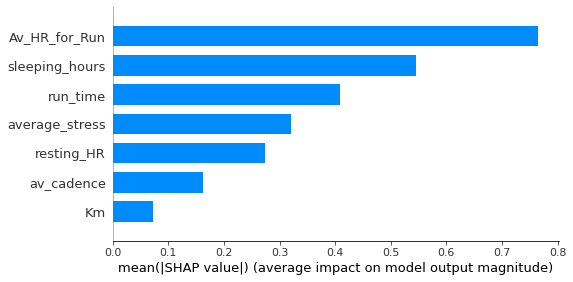

In [489]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, plot_type='bar')

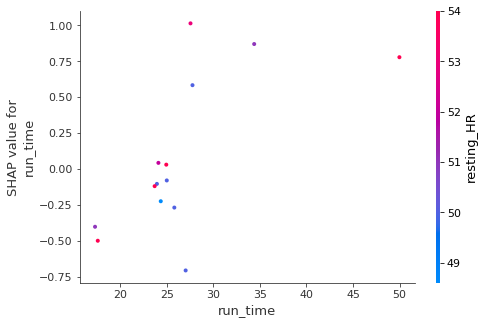

In [438]:
shap.dependence_plot("run_time", shap_values, X_test)

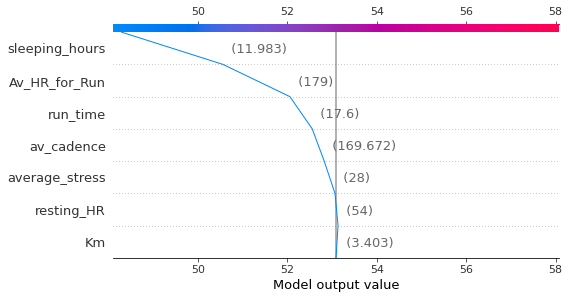

In [439]:
shap.decision_plot(explainer.expected_value, shap_values[3], X_test.iloc[3])#, matplotlib=True)  

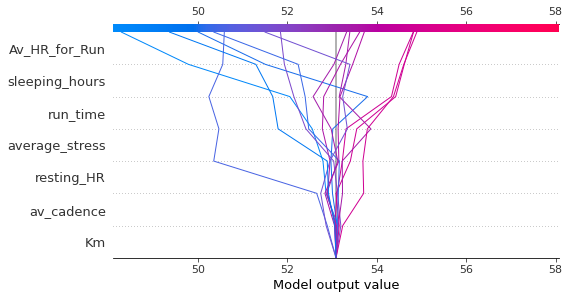

In [440]:
shap.decision_plot(explainer.expected_value, shap_values, X_test)#, matplotlib=True)

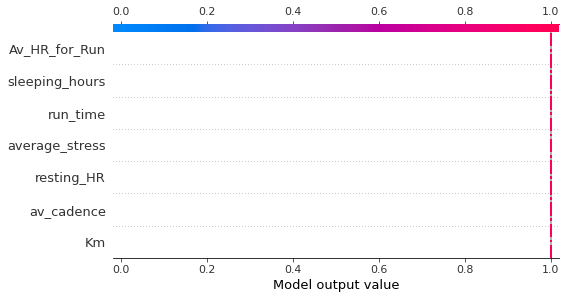

In [441]:
misclassified = pred != y_test
shap.decision_plot(explainer.expected_value, shap_values, X_test, link='logit', highlight=misclassified)

In [442]:
shap.force_plot(explainer.expected_value, shap_values, X_test)#, matplotlib=True)

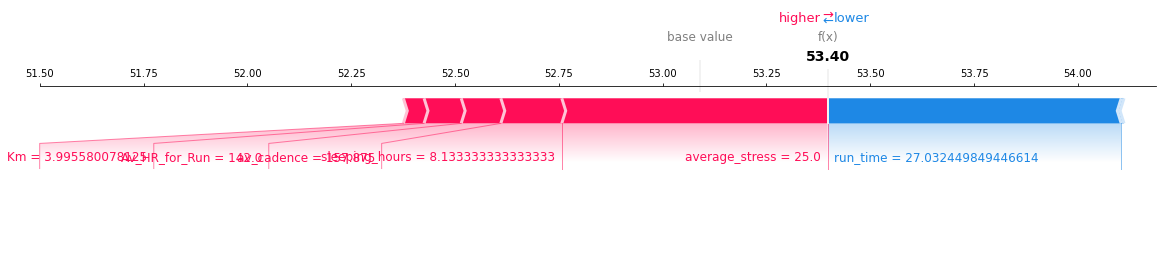

In [443]:
shap.force_plot(explainer.expected_value, shap_values[8], X_test.iloc[8], matplotlib=True)

In [444]:
y_test

160    52.0
1      52.0
295    55.0
22     50.0
308    55.0
139    51.0
74     50.0
253    53.0
285    54.0
102    50.0
239    53.0
69     50.0
361    55.0
31     50.0
Name: VO2, dtype: float64

In [445]:
pred

array([53.617275, 50.00964 , 54.815975, 48.290924, 54.821087, 50.59177 ,
       51.847088, 53.720676, 53.39717 , 50.358532, 53.325428, 51.502575,
       54.895275, 49.367657], dtype=float32)

# Plot data to observe insights:

In [291]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['Av_HR_for_Run']/3,
                    mode='lines+markers',
                    text=result['Av_HR_for_Run'],
                    connectgaps=True,
                    name='Av_HR_for_Run'))
fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines+markers',
                    name='average_stress'))


fig.add_trace(go.Scatter(x=result['Date'], y=result['sleeping_hours'],
                    mode='lines', name='sleeping_hours', connectgaps=True))
        
fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='lines+markers', name='VO2 Max',connectgaps=True))

fig.update_layout(title='Health metrics over time',
                   xaxis_title='Date',
                   yaxis_title='Health Features')

fig.show()

In [292]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['Av_HR_for_Run']/3,
                    mode='lines+markers',
                    text=result['Av_HR_for_Run'],
                    connectgaps=True,
                    name='Av_HR_for_Run'))
fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines+markers',
                    name='average_stress'))


fig.add_trace(go.Scatter(x=result['Date'], y=result['sleeping_hours'],
                    mode='lines', name='sleeping_hours', connectgaps=True))
        
fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='lines+markers', name='VO2 Max',connectgaps=True))

fig.update_layout(title='Health metrics over time - Zoomed in to change from 54 -> 55',
                   xaxis_title='Date',
                   yaxis_title='Health Features')

fig.show()

### Plot other features:

In [284]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['resting_HR'],
                    mode='lines',
                    name='resting_HR'))
fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines+markers',
                    name='average_stress'))
fig.add_trace(go.Bar(
            x=result['Date'], y=result['run_time'],
            text=result['run_time'],
            textposition='auto',
            name='run_time_mins'
        ))

fig.add_trace(go.Bar(
            x=result['Date'], y=result['Km']*6,
            text=result['Km'],
            textposition='auto',
            name='Km'
))

fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='lines+markers', name='VO2_Max'))


fig.show()

In [281]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=result['Date'], y=result['resting_HR'],
                    mode='lines',
                    name='lines'))

fig.add_trace(go.Bar(
            x=result['Date'], y=result['run_time'],
            text=result['run_time'],
            textposition='auto',
        ))

fig.add_trace(go.Bar(
            x=result['Date'], y=result['Km']*6,
            text=result['Km'],
            textposition='auto',
))

fig.add_trace(go.Scatter(x=result['Date'], y=result['VO2'],
                    mode='markers', name='markers'))

fig.add_trace(go.Scatter(x=result['Date'], y=result['average_stress'],
                    mode='lines',
                    name='stress'))

fig.show()